<h1>K-Means</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
data = pd.read_csv('AimoScore_WeakLink_big_scores.csv')
data.drop('EstimatedScore', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)

In [ ]:
features_names = [
    'No_1_Angle_Deviation', 'No_2_Angle_Deviation', 'No_3_Angle_Deviation', 'No_4_Angle_Deviation',
            'No_5_Angle_Deviation', 'No_6_Angle_Deviation', 'No_7_Angle_Deviation', 'No_8_Angle_Deviation',
            'No_9_Angle_Deviation', 'No_10_Angle_Deviation', 'No_11_Angle_Deviation', 'No_12_Angle_Deviation',
            'No_13_Angle_Deviation', 'No_1_NASM_Deviation', 'No_2_NASM_Deviation', 'No_3_NASM_Deviation',
            'No_4_NASM_Deviation', 'No_5_NASM_Deviation', 'No_6_NASM_Deviation', 'No_7_NASM_Deviation',
            'No_8_NASM_Deviation', 'No_9_NASM_Deviation', 'No_10_NASM_Deviation', 'No_11_NASM_Deviation',
            'No_12_NASM_Deviation', 'No_13_NASM_Deviation', 'No_14_NASM_Deviation', 'No_15_NASM_Deviation',
            'No_16_NASM_Deviation', 'No_17_NASM_Deviation', 'No_18_NASM_Deviation', 'No_19_NASM_Deviation',
            'No_20_NASM_Deviation', 'No_21_NASM_Deviation', 'No_22_NASM_Deviation', 'No_23_NASM_Deviation',
            'No_24_NASM_Deviation', 'No_25_NASM_Deviation', 'No_1_Time_Deviation', 'No_2_Time_Deviation']
label = 'AimoScore'
X = data.loc[:, features_names]
aimo = data.loc[:, 'AimoScore']

In [ ]:
elbow = []
ss = []
for i in range(2, 15):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    elbow.append(km.inertia_)
    labels = km.labels_
    sscal = metrics.silhouette_score(X, labels)
    ss.append(sscal)

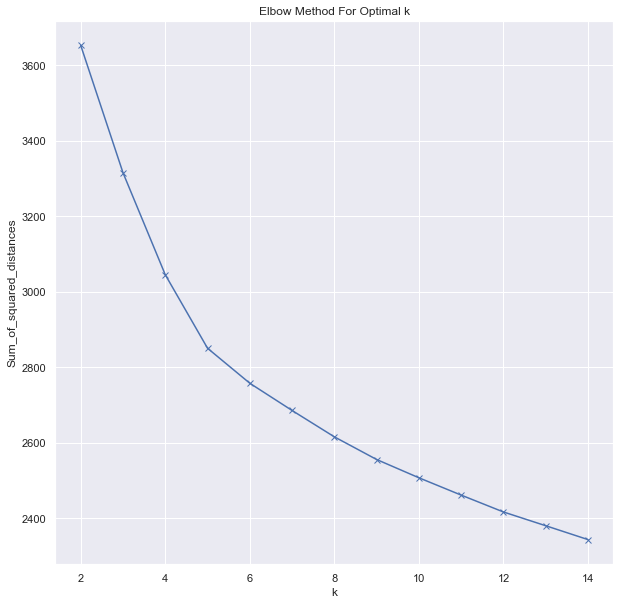

In [ ]:
plt.plot(range(2, 15), elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

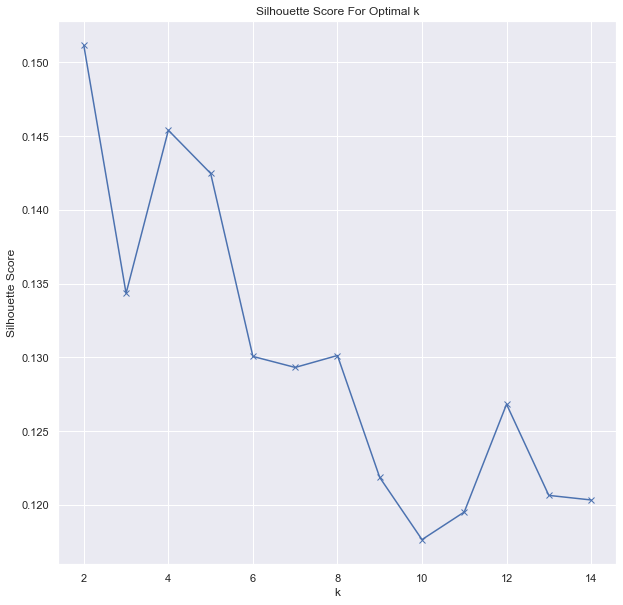

In [ ]:
plt.plot(range(2, 15), ss, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

From the elbow method, we see that the optimal k could be around 5 or 6 (although it does not seem very clear), however Silhouette score method suggested that the better-defined clusters would be if the k was 2. Therefore, both k values will be tested.

In [ ]:
kmeans_model = KMeans(n_clusters=5, random_state=0)
pred = kmeans_model.fit_predict(X)
results =  pd.DataFrame({'Clusters': pred})

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(data)
results_reduced = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

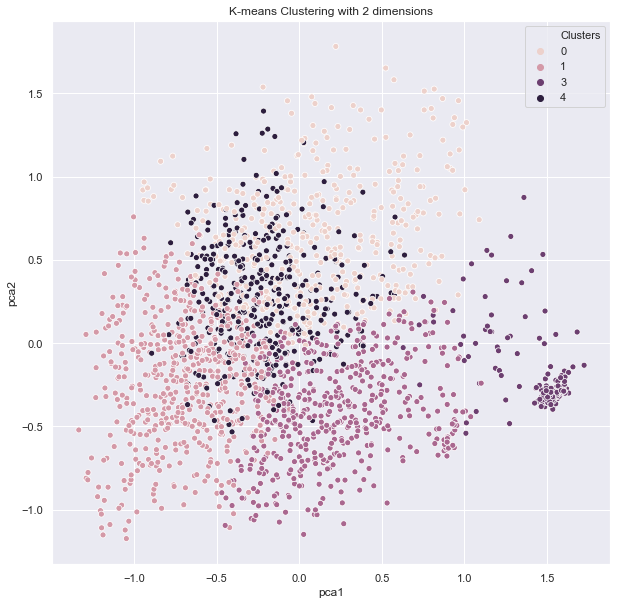

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue=results['Clusters'], data=results_reduced)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=0)
pred = kmeans_model.fit_predict(X)
results =  pd.DataFrame({'Clusters': pred})

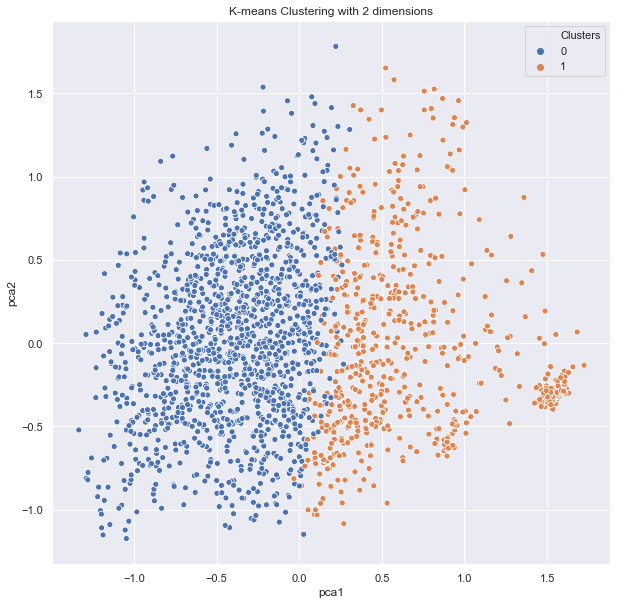

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue=results['Clusters'], data=results_reduced)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

PCA was ran on the data to reduce the dimentions (as 40 featuers were used) in order to be able to visualize the clusters. 

Having k=5, it seems that a lot of the datapoints are overlapping. This is especially visible with datapoints assigned to cluster 4 and cluster 1 or cluster 4 and cluster 0. However, with k=2, we see that the data is divided into two groups and while there are some datapoints mixed up between the groups (in the middle), the difference between these two groups is more clear.

<h1>Hierarchical</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data = pd.read_csv('data.csv', decimal=',')
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
features_names = [
      'No_1_Angle_Deviation', 'No_2_Angle_Deviation', 'No_3_Angle_Deviation', 'No_4_Angle_Deviation',
            'No_5_Angle_Deviation', 'No_6_Angle_Deviation', 'No_7_Angle_Deviation', 'No_8_Angle_Deviation',
            'No_9_Angle_Deviation', 'No_10_Angle_Deviation', 'No_11_Angle_Deviation', 'No_12_Angle_Deviation',
            'No_13_Angle_Deviation', 'No_1_NASM_Deviation', 'No_2_NASM_Deviation', 'No_3_NASM_Deviation',
            'No_4_NASM_Deviation', 'No_5_NASM_Deviation', 'No_6_NASM_Deviation', 'No_7_NASM_Deviation',
            'No_8_NASM_Deviation', 'No_9_NASM_Deviation', 'No_10_NASM_Deviation', 'No_11_NASM_Deviation',
            'No_12_NASM_Deviation', 'No_13_NASM_Deviation', 'No_14_NASM_Deviation', 'No_15_NASM_Deviation',
            'No_16_NASM_Deviation', 'No_17_NASM_Deviation', 'No_18_NASM_Deviation', 'No_19_NASM_Deviation',
            'No_20_NASM_Deviation', 'No_21_NASM_Deviation', 'No_22_NASM_Deviation', 'No_23_NASM_Deviation',
            'No_24_NASM_Deviation', 'No_25_NASM_Deviation', 'No_1_Time_Deviation', 'No_2_Time_Deviation'
        ]

X = data.loc[:, features_names]

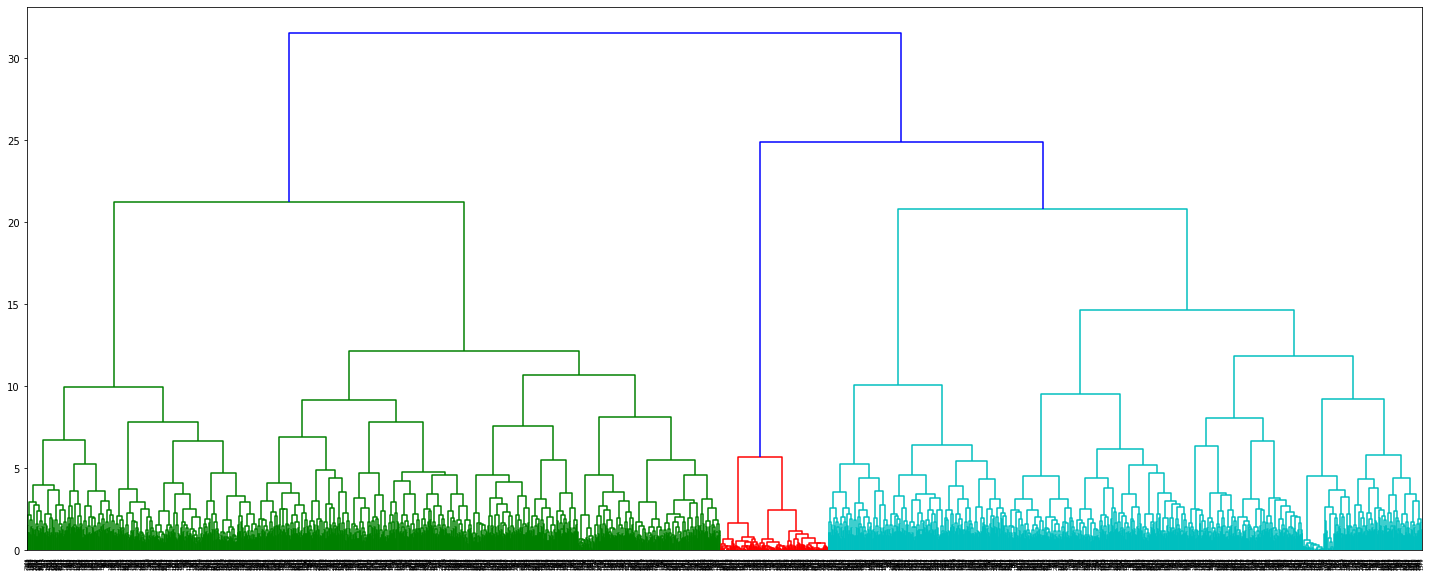

In [ ]:
plt.figure(figsize=(25, 10))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit_predict(X)

array([3, 3, 1, ..., 0, 4, 1], dtype=int64)

In [ ]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit_predict(X)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

Looking at the dendrogram, the highest vertical distance that doesn’t intersect with any clusters is the green one. Given that 5 vertical lines cross the threshold, the optimal number of clusters is therefore 5. We create an instance of AgglomerativeClustering using the euclidean distance as the measure of distance between points and ward linkage to calculate the proximity of clusters. Ward's method is the closest, by it properties and efficiency, to K-means clustering; they share the same objective function - minimization of the pooled within-cluster SS "in the end". Furthermore, Ward seems to me a bit more accurate than K-means in uncovering clusters of uneven physical sizes (variances) or clusters thrown about space very irregularly.

<h1>PCA</h1>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/AimoScore_WeakLink_big_scores_labels.csv').drop('Unnamed: 0', axis=1)
X = StandardScaler().fit_transform(df.iloc[:,1:41]) # Everything
print('Mean : ' ,'{:f}'.format(np.mean(X)))
print('Standard deviation : ' , '{:f}'.format(np.std(X)))
pd.DataFrame(data=X)

Mean :  0.000000
Standard deviation :  1.000000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.005132,1.104040,-0.980525,-0.514885,-0.783982,1.594477,-0.926443,-0.744981,-0.204148,-1.206693,1.225748,-0.187523,-1.267825,-0.783982,-0.926443,-0.005132,-1.206693,-1.267825,0.971205,-1.110728,-0.587601,-0.922573,-0.458369,0.794737,0.241501,1.259399,1.185026,-0.826722,0.471293,0.659645,-0.056029,1.132699,-0.590757,-0.604972,-0.710263,-0.599024,-0.682085,0.051739,1.134085,1.123968
1,-0.398955,-0.701640,1.208909,-1.246623,-0.061338,-1.349132,0.551104,-0.744981,0.799505,1.507735,-0.609517,-1.002247,0.934616,-0.061338,0.551104,-0.398955,1.507735,0.934616,-0.681351,-1.295333,-0.849986,-0.681032,1.238325,1.887119,0.803503,-0.159876,0.791859,1.334063,0.330560,-0.928572,-0.850659,-0.574134,0.052210,1.134320,1.081022,1.338564,1.691622,1.165485,-0.747404,-0.969125
2,0.268745,-0.462578,-0.980525,0.274813,-0.636974,-0.770518,-0.922804,-0.080254,0.536686,-1.075409,-0.609517,1.608265,-1.025305,-0.636974,-0.922804,0.268745,-1.075409,-1.025305,0.569157,-0.588865,-0.993104,-1.143028,-1.072968,-1.040381,-1.017721,-0.716975,0.647810,0.523769,1.709749,-0.928572,0.733408,-0.574134,-0.590757,-0.604972,0.266801,-0.599024,-0.682085,0.033073,-1.075001,-1.016496
3,-0.227032,0.422460,-0.826803,1.731045,-0.017058,1.378368,-0.593449,1.380274,-1.015537,0.777354,1.331375,-0.258811,1.047792,-0.017058,-0.593449,-0.227032,0.777354,1.047792,-0.811670,0.355458,1.047421,1.475592,1.810607,0.558882,0.659833,0.533181,-0.180892,-0.826722,-0.558072,-0.173256,1.824077,2.401495,-0.590757,-0.604972,-0.710263,-0.599024,-0.682085,0.852308,-0.197323,-0.291896
4,1.344263,0.542838,0.850957,0.131726,-0.511220,-0.099536,-0.498828,-0.744981,-0.459912,-1.206693,-0.609517,-1.453740,-0.525894,-0.511220,-0.498828,1.344263,-1.206693,-0.525894,-0.811670,1.360133,-0.357744,0.014839,0.462521,-0.388676,-0.590938,-0.716975,-1.357005,-0.826722,-0.240416,-0.634204,-0.850659,-0.574134,-0.590757,-0.604972,-0.710263,-0.599024,-0.682085,-1.037119,1.074522,0.960802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,-1.084648,-1.323879,-0.980525,-0.761213,1.598264,0.496506,1.499136,-0.744981,0.213894,1.701887,-0.609517,1.231455,1.707087,1.598264,1.499136,-1.084648,1.701887,1.707087,-0.282076,-0.127354,-0.993104,-0.130853,-0.609500,1.750571,1.593686,-0.716975,1.152827,-0.826722,0.901536,-0.928572,1.039834,-0.574134,2.281161,-0.604972,-0.401538,-0.599024,0.628931,1.715098,0.633055,0.730965
2090,0.106818,-0.682990,-0.844371,-1.246623,-1.207296,-0.594494,-1.110227,-0.744981,-0.973203,1.348715,-0.609517,-1.365478,1.243605,-1.207296,-1.110227,0.106818,1.348715,1.243605,-0.811670,-0.723768,-0.993104,-0.682949,-1.072968,-1.040381,-1.017721,-0.716975,-1.458686,0.815475,0.827148,-0.928572,-0.648106,-0.574134,0.371312,-0.604972,-0.710263,-0.599024,1.541895,-1.006009,-1.330771,-1.325285
2091,-0.563308,-1.028261,1.205684,1.588297,0.834497,1.453784,0.616530,0.144523,1.142639,0.354210,-0.121284,0.067806,0.239858,0.834497,0.616530,-0.563308,0.354210,0.239858,-0.375348,1.635507,1.421233,1.453200,0.750359,-1.058809,-0.720169,-1.801874,-1.200241,-0.825042,0.081903,-0.785324,2.021667,2.608330,1.701727,-0.622686,-0.905594,0.641723,1.185955,-0.782229,0.263849,0.212147
2092,0.283097,1.274280,-0.425815,-1.108383,1.600322,0.715890,1.577740,-2.170899,0.235538,0.915520,-1.272724,0.961023,0.948437,1.600322,1.577740,0.283097,0.915520,0.948437,-0.375348,-0.573030,1.421233,1.453200,-0.406650,1.290166,1.421239,-1.801874,1.299226,0.496542,-0.954019,-0.785324,1.741611,2.276502,1.701727,-0.622686,0.517250,0.451945,1.185955,1.715449,1.616090,1.629487


In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

      principal component 1  principal component 2
0                 -1.796876               0.639269
1                  3.525186              -1.111143
2                 -1.951913              -1.816432
3                  0.206863               3.011803
4                 -2.893345              -0.696197
...                     ...                    ...
2089               6.446919              -1.427327
2090              -0.180233              -2.933338
2091               0.683436               1.676380
2092               4.457410               1.273604
2093               0.000224              -1.969454

[2094 rows x 2 columns]


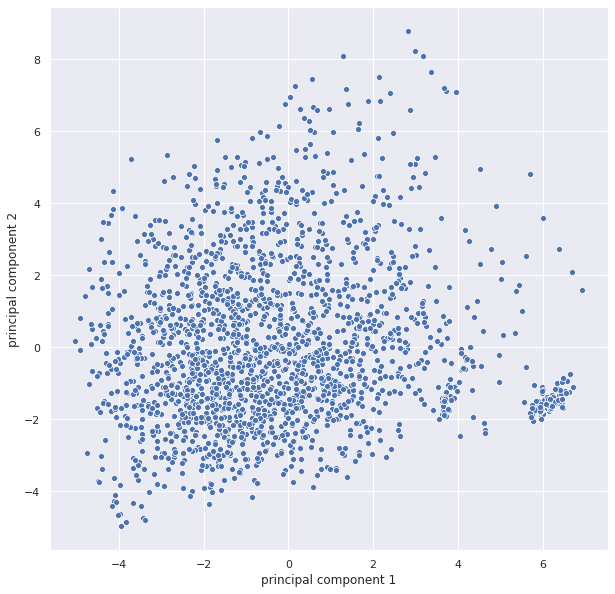

In [ ]:
sns.scatterplot(x="principal component 1", y="principal component 2", data=principalDf)
plt.show()

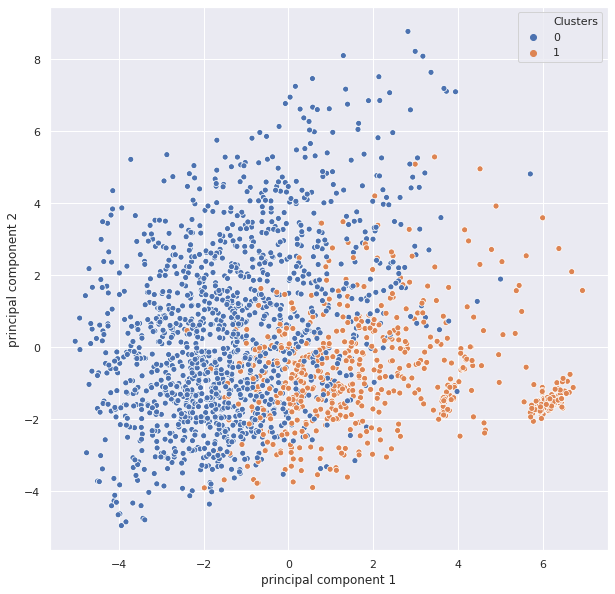

In [ ]:
# AgglomerativeClustering 2 Clusters

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
pred = model.fit_predict(X)
results =  pd.DataFrame({'Clusters': pred})


sns.scatterplot(x="principal component 1", hue=results['Clusters'], y="principal component 2", data=principalDf)
plt.show()

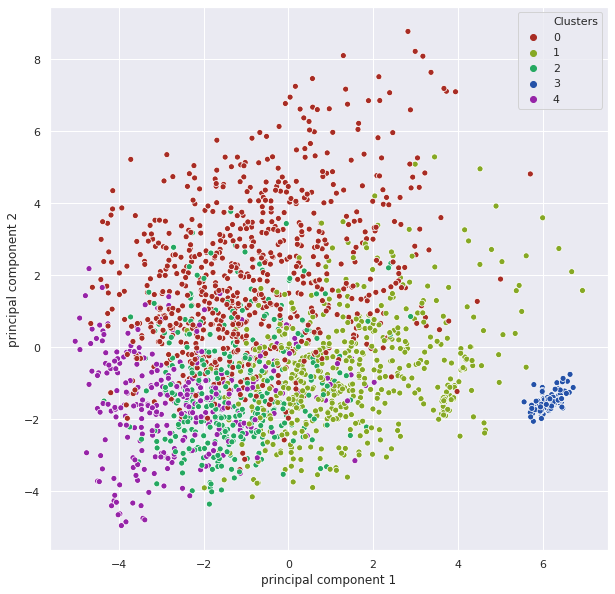

In [ ]:
# AgglomerativeClustering 5 Clusters

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
pred = model.fit_predict(X)
results =  pd.DataFrame({'Clusters': pred})


sns.scatterplot(x="principal component 1", hue=results['Clusters'], y="principal component 2", palette=sns.hls_palette(5, l=.4), data=principalDf)
plt.show()

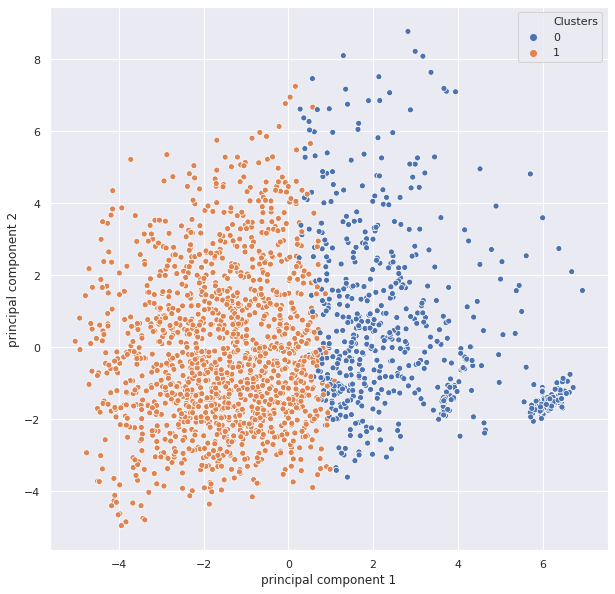

In [ ]:
# KMeans 2 Clusters

kmeans_model = KMeans(n_clusters=2, random_state=0)
pred = kmeans_model.fit_predict(X)
results = pd.DataFrame({'Clusters': pred})

sns.scatterplot(x="principal component 1", hue=results['Clusters'], y="principal component 2", data=principalDf)
plt.show()

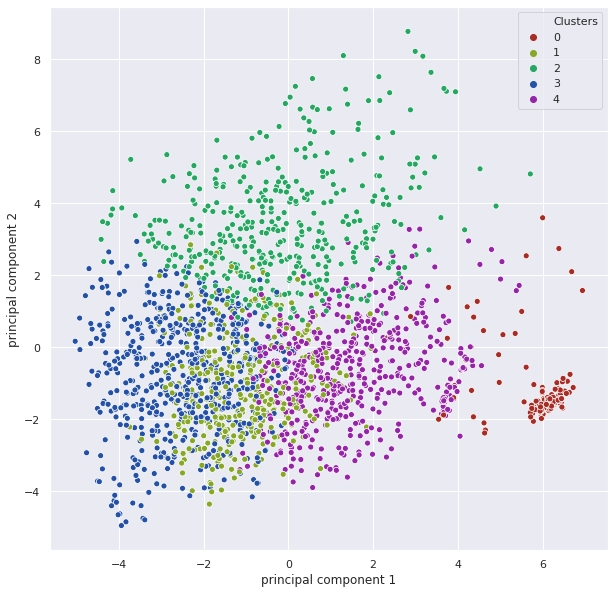

In [ ]:
# KMeans 5 Clusters

kmeans_model = KMeans(n_clusters=5, random_state=0)
pred = kmeans_model.fit_predict(X)
results = pd.DataFrame({'Clusters': pred})

sns.scatterplot(x="principal component 1", hue=results['Clusters'], y="principal component 2",palette=sns.hls_palette(5, l=.4), data=principalDf)
plt.show()